In [1]:
import numpy as np
import pickle
from nengo_extras.plot_spikes import (
    plot_spikes,
)
import matplotlib.pyplot as plt
from build_and_run import Build_sPyNNaker_Network


import os
path = os.getcwd().removesuffix('\pynn_models')
import sys
sys.path.insert(1, path)
from algorithm2.config import Config
from algorithm2.data.DataModule import DataModule
from algorithm2.data.helpers import choose_data_params
from algorithm2.model.LightningSNN import Lightning_SNN


import torch


c:\Users\madta\miniforge3\envs\nengo\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Get input data
data_set_name='shd'
config_path = 'PN_eq_dt2_oi'
settings = Config(data_set_name,settings_file=config_path)
trainloader, valloader,testloader, nb_steps = choose_data_params(
        data_set_name, settings, num_workers=4,pre_path='data/shd'
    ) 
data_module = DataModule(trainloader, valloader, testloader)
data_module.setup(stage="test")  # make sure test data is prepared
test_loader = data_module.train_dataloader()
test_batch = next(iter(test_loader))
inputs, target = test_batch

model = Lightning_SNN.load_from_checkpoint('C:\\Users\\madta\\Documents\\GitHub\\summerschool2025\\projects\\model_example\\student_SNN_SHD\\checkpoints\\epoch=99-val_acc=0.86.ckpt',strict=False,target_model=None).eval()


self.synapse intr noise is 0.002
nb hidden inside config: 128
self.synapse_noise: 0.002
shape in config tau_mem: torch.Size([128])
shape in config beta: torch.Size([128])
config wsf: 1.0
encoding dim: 70, sensor size: (700, 1, 1)
data already downloaded: True


c:\Users\madta\Documents\GitHub\summerschool2025\projects\algorithm\config\Config.py:145: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.beta = torch.exp(-self.time_step / torch.tensor(self.tau_mem))


[tensor([[[[0, 0, 0,  ..., 0, 1, 0]],

         [[0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0]],

         [[0, 1, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.int16), tensor([11], dtype=torch.int32)]
encoding dim: 70, sensor size: (700, 1, 1)
data already downloaded: True
[tensor([[[[0, 0, 0,  ..., 0, 1, 1]],

         [[0, 0, 0,  ..., 1, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 1]],

         ...,

         [[0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0]]]], dtype=torch.int16), tensor([10], dtype=torch.int32)]
initializing data module
lightning init device cpu
N rec = 0
N unrec = 128
hidden in loss in SNN are None
first instance of tau_mem in SNN: torch.Size([128])
LIF model with, U_rest 0.0, rest 0.0, tau mem tensor([0.0674, 0.0863, 0.0920, 0.1184, 0.0825, 0.1600, 0.0485, 0.1203, 0.1392,
        0.0872, 0.1345, 0.0466, 0.0523, 0.0513,

In [3]:
spynn_model = Build_sPyNNaker_Network(inputs[:,0,:,:],model.model)

2025-06-12 16:32:23 WARNING: c:\Users\madta\Documents\GitHub\summerschool2025\projects\pynn_models\reports has 26 old reports that have not been closed


['c:\\Users\\madta\\miniforge3\\envs\\nengo\\lib\\site-packages\\spinn_utilities\\spinn_utilities.cfg', 'c:\\Users\\madta\\miniforge3\\envs\\nengo\\lib\\site-packages\\spinn_machine\\spinn_machine.cfg', 'c:\\Users\\madta\\miniforge3\\envs\\nengo\\lib\\site-packages\\pacman\\pacman.cfg', 'c:\\Users\\madta\\miniforge3\\envs\\nengo\\lib\\site-packages\\spinnman\\spinnman.cfg', 'c:\\Users\\madta\\miniforge3\\envs\\nengo\\lib\\site-packages\\spinn_front_end_common\\interface\\spinnaker.cfg', 'c:\\Users\\madta\\miniforge3\\envs\\nengo\\lib\\site-packages\\spynnaker\\pyNN\\spynnaker.cfg', 'C:\\Users\\madta\\.spynnaker.cfg']


In [4]:
spikes, volts_h, volts_o = spynn_model.run_the_sim(inputs.shape[0])

Adding Splitter selectors where appropriate
|0%                          50%                         100%|
Adding delay extensions as required
|0%                          50%                         100%|
Partitioning Graph
|0%                          50%                         100%|
Reading details from 4 chips
|0%                          50%                         100%|
Adding commands
|0%                          50%                         100%|
Inserting extra monitors into graphs
|0%                          50%                         100%|
Placing Vertices
|0%                          50%                         100%|
Generating routing tables for data in system processes
|0%                          50%                         100%|
Routing
|0%                          50%                         100%|
Allocating tags
|0%                          50%                         100%|
Calculating zones
|0%                          50%                         100%|
Allocating r

In [5]:
spynn_model.end()

10.366302490234375
[[125   6]]


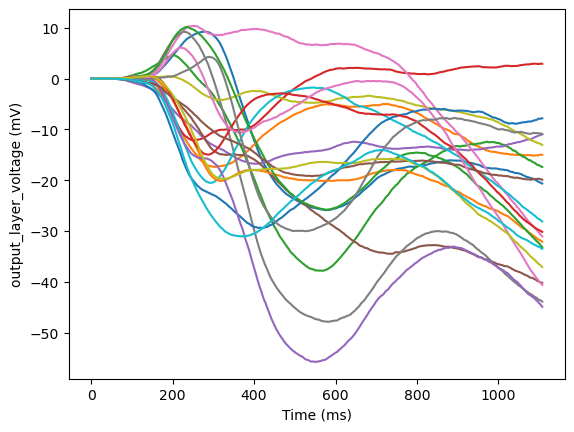

In [26]:
plt.plot(np.arange(0,2*inputs.shape[0],2),volts_o.segments[0].analogsignals[0])
plt.xlabel('Time (ms)')
plt.ylabel('output_layer_voltage (mV)')
print(np.max(np.array(volts_o.segments[0].analogsignals[0])))
print(np.argwhere(np.array(volts_o.segments[0].analogsignals[0])==np.max(np.array(volts_o.segments[0].analogsignals[0]))) )

In [ ]:
for i in range(70):
    if i == 10:
        plt.plot(np.arange(0,2*inputs.shape[0],2),volts_o.segments[0].analogsignals[0][i], color='maroon')
    else:
        plt.plot(np.arange(0,2*inputs.shape[0],2),volts_o.segments[0].analogsignals[0][i], color='grey')
plt.xlabel('Time (ms)')
plt.ylabel('Output Voltage (a.u.)')

In [7]:
plt.plot(np.arange(0,2*inputs.shape[0]+1,2),out_rec[0][:,:])
plt.xlabel('time')

NameError: name 'out_rec' is not defined

Text(0, 0.5, 'output_layer_voltage (mV)')

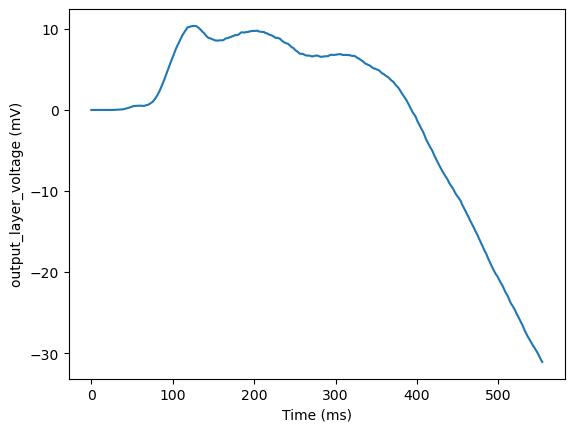

In [34]:
plt.plot(volts_o.segments[0].analogsignals[0][:,6])
plt.xlabel('Time (ms)')
plt.ylabel('output_layer_voltage (mV)')

In [10]:
print(target)

tensor([12, 16, 15,  2,  8,  8,  7,  1,  2, 13, 10, 17, 17,  0, 16,  3, 19,  5,
        14, 15,  2,  9, 10, 10, 13, 18,  1,  7,  0,  0, 13,  4,  6, 16, 17, 15,
         9, 14,  3,  3, 19,  2,  5,  7, 14,  2, 16, 18,  7,  5, 11,  5, 16,  8,
         8, 10,  3,  3, 11,  4, 15,  2, 16, 18,  2,  2,  7,  7, 15,  9, 16, 19,
        13, 11, 15,  6, 11,  4, 10, 17,  9, 19, 14,  4,  7,  8,  1,  4,  1,  8,
         9,  6, 19,  6,  3, 16, 11,  4,  0,  5,  5,  1, 19, 15, 10,  2,  2,  3,
        11, 14,  8, 10, 13,  4,  9,  5,  3,  8,  3, 12,  5,  7,  9, 17,  7, 16,
        13,  0, 13,  0, 19, 16, 14, 15, 11, 16, 17, 11, 19, 13, 15, 10,  2,  6,
         9,  7, 10,  5, 13,  4,  9,  6,  4,  5, 13,  3, 16, 11, 13, 19,  3, 16,
         6,  0, 13, 15,  4, 11,  9, 10, 17, 16, 14,  6,  8,  4,  8,  5, 18, 19,
        15,  1,  9,  1, 13, 11, 15,  3, 17,  5, 19,  5, 18,  2,  0,  5, 10,  4,
         6,  4, 11,  7,  5,  4, 10,  0,  1, 19,  6,  1, 11, 11,  9,  5, 11,  4,
         7, 19,  4,  9,  2,  7, 14, 18, 

In [10]:
def get_spikes_vector(spike_train, vector_length):
    spike_vector = np.zeros(vector_length) #all neurons should have the same duration.
    float_tuple = tuple(spike_train.magnitude)
    spike_vector[ list(int(x) for x in float_tuple)] = 1000*np.ones(spike_train.times.shape[0])
    return spike_vector

def get_spikes_array(spike_train_array):
    vector_length = int(spike_train_array[0].duration.item()) #All neurons will have the same duration
    spike_array=np.zeros([len(spike_train_array),vector_length])
    for i in range(len(spike_train_array)):
        spike_array[i,:] = get_spikes_vector(spike_train_array[i], vector_length)
    return spike_array

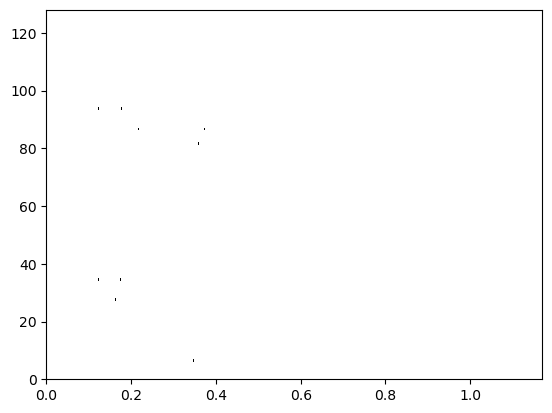

In [11]:
maybe_spikearray = get_spikes_array(spikes.segments[0].spiketrains)
plot_spikes(np.arange(0,model.model.time_step*inputs.shape[0],model.model.time_step),maybe_spikearray.T)
#plt.plot(maybe_spikearray[20])

In [9]:
def solution(h2):
    nb_steps = inputs.shape[0]
    flt = np.zeros((1, model.model.nb_outputs))
    out = np.zeros((1, model.model.nb_outputs))
    out_rec = [out]
    for t in range(nb_steps):
        new_flt = model.model.alpha_out * flt + h2[:, t]
        new_out = model.model.beta_out * out + (1 - model.model.beta_out) * flt

        flt = new_flt
        out = new_out

        out_rec.append(out)

    return np.stack(out_rec, axis=1)
#print(np.exp(0.001/(model.model.time_step/np.log(model.model.alpha_out))))

def solution_euler(h2):
    nb_steps = inputs.shape[0]
    flt = np.zeros((1, model.model.nb_outputs))
    out = np.zeros((1, model.model.nb_outputs))
    out_rec = [out]
    for t in range(nb_steps):
        new_flt = model.model.alpha_out * flt + h2[:, t]
        new_out = model.model.time_step*(out/(model.model.time_step/np.log(model.model.beta_out))  + flt) + out

        flt = new_flt
        out = new_out

        out_rec.append(out)

    return np.stack(out_rec, axis=1)

In [10]:
h2 = np.dot(model.model.w2.detach().numpy().T,maybe_spikearray)
out_rec = solution(h2)
out_rec_euler = solution_euler(h2)

In [12]:
plt.plot(out_rec[0][:,:])

NameError: name 'out_rec' is not defined

In [ ]:
spynn_model.reset()

In [7]:
def get_voltages(settings,inputs,student,to_student=True):
    
    student.call_outside_loop=True
    #trainloader, valloader,testloader, nb_steps = choose_data_params(
    #    data_set_name, settings, num_workers=4,pre_path='data/shd'
    #) 
    # data_module = DataModule(trainloader, valloader, testloader)
    # data_module.setup(stage="test")  # make sure test data is prepared
    # test_loader = data_module.test_dataloader()
    # test_batch = next(iter(test_loader))
    # inputs, target = test_batch

    mems= (-student.model.time_step/torch.log(student.model.beta)).cpu().detach().numpy() #tau_mem

    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    inputs = inputs.to(device)
    #target = target.to(device)
    print(inputs.device)
    
    student.model.eval()
    student.model.tau_mem=mems

    output, [mem_rec,spk_rec]=student.model.forward(inputs,target)

    return mem_rec, spk_rec,output

mem_rec, spk_rec,output =get_voltages(settings,inputs,model)

cpu
torch.Size([256, 555, 1, 70])
torch.Size([256, 555, 70])
256
nb_steps in forward is 555


In [16]:
#print(model.model.tau_mem)
#print((-model.model.time_step/np.log(model.model.beta)).numpy()*1000,)

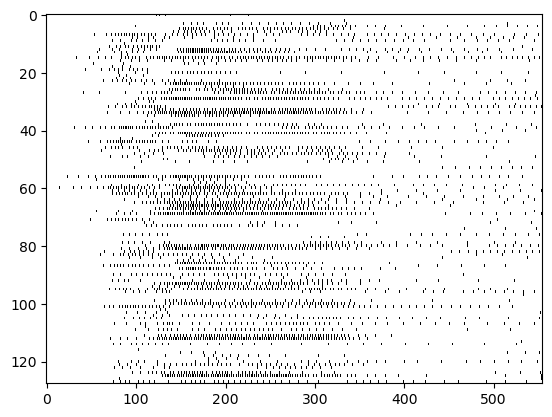

In [8]:
plt.imshow(spk_rec[0,:,:].T.detach().numpy(),cmap='binary',aspect='auto',interpolation='None')



torch.Size([556, 20])
11.289833
[[113  12]]


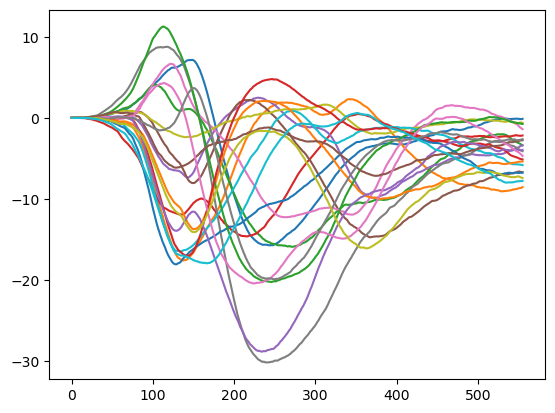

In [33]:
print(output[0,:,:].shape)
plt.plot(output[0,:,:].detach().numpy())
print(np.max(output[0,:,:].detach().numpy()))
print(np.argwhere(np.abs(np.max(output[0,:,:].detach().numpy())-output[0,:,:].detach().numpy())<=0.001))

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplot(2,2)
for i in range(70):
    if i == 10:
        ax1.plot(np.arange(0,2*inputs.shape[0],2),output[0,:,i].detach().numpy(),color='maroon')
    else:
        ax1.plot(np.arange(0,2*inputs.shape[0],2),output[0,:,i].detach().numpy(),color='grey')

for i in range(70):
    if i == 10:
        ax2.plot(np.arange(0,2*inputs.shape[0],2),volts_o.segments[0].analogsignals[0][:,i], color='maroon')
    else:
        ax2.plot(np.arange(0,2*inputs.shape[0],2),volts_o.segments[0].analogsignals[0][:,i], color='grey')

ax3.imshow(spk_rec[0,:,:].T.detach().numpy(),cmap='binary',aspect='auto',interpolation='None')
#plt.subplot(2,2,4)
#plot_spikes(np.arange(0,model.model.time_step*inputs.shape[0],model.model.time_step),maybe_spikearray.T)
ax4.imshow(maybe_spikearray.T, cmap='binary',aspect='auto',interpolation='None')
ax1.xlabel('Time (ms)')
ax1.ylabel('Output Voltage (a.u.)')
ax2.xlabel('Time (ms)')
ax2.ylabel('Output Voltage (a.u.)')
ax3.xlabel('Time steps')
ax3.ylabel('Neuron Number')
ax4.xlabel('Time steps')
ax4.ylabel('Neuron Number')
plt.savefig('sPynnaker_toy_results.png')

In [ ]:
plt.imshow(spk_rec[0,:,:].T.detach().numpy(),cmap='binary',aspect='auto',interpolation='None')

In [ ]:
print(np.log(10))